# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 01: Working with various omic data types (40 min)

- Time: 8:00 - 8:40:00 EDT, Jul 11, 2024

Welcome to the practical session 01. created by professor Qiyun Zhu and adapted by Nelly Selem (Secodment host), Jeanett Daga (Secodment).


🏆 QUESTIONS

why is important understand the format files in biologic data?

🎯 AIMS

1.   To use scikit-bio for importing, processing, and integrating diverse file formats (Biom, csv, tsv, fa, nwk format) along with associated metadata, ensuring data compatibility and readiness for downstream microbiome and metabolomic analyses.
2.   To extract atin American samples from the EMP500 dataset and process data in TSV, BIOM, FASTA, and other formats into unified tables for appropriate visualization using Google Colab, ensuring accurate data management and preparation for subsequent analyses.


🔑 KEY POINTS


*   EMP500 project
*   Multi-omics data

---
📥 **Input: Multi-omic dataset from EMP500 project

  16S rRNA gene amplicon data (taxonomic composition)

  Shotgun metagenomics (functional and genomic potential)

  Untargeted metabolomics (metabolite-level biochemical activity)

📤 Output:

  Subset data from Latin American samples.

    

[**Omics**](https://en.wikipedia.org/wiki/Omics) refer to the studies of the totality of biological entities within a system. They usually employ high-throughput techniques, such as DNA sequencing and mass spectrometry, to generate information about all molecules, genes, cells, organisms, and more. This information can be analyzed using bioinformatics methods to inform the structure, function and dynamics of the biological entities.

In microbiome research, because isolating and cultivating all microbes in a habitat is usually infeasible, omics are essential tools to characterize the microbiome (the name of which already indicates this nature). The prefix "**meta**-" is usually added to an omic to indicate the study of biological entities from all microorganisms within the environment (e.g., [metagenomics](https://en.wikipedia.org/wiki/Metagenomics)). Omics for microbiota can be employed in combination with omics for their host or the environment to profile a more comprehensive image of the biological system.

Depending on the biological molecules it studies, the most common omics for host and microbiota include:

- Molecule: DNA - mRNA - protein - metabolite
- (Host) ome: genome - transcriptome - proteome - metabolome
- (Microbiota) ome: metagenome - metatranscriptome - metaproteome - (meta)metabolome

In this section, we will use a real-world study -- the **Earth Microbiome Project 500** ([EMP500](https://earthmicrobiome.org/emp500/)), as an example to explore various omic data types. We will navigate the data tables and relevant data files associated with individual omics, discuss the unique challenges and solutions in working with omic data, and compare between omic data types. This process will support the analyses in all subsequent sections.

## Preparation (7 min)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:

    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 57.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 98.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Installation of skbio (cell [2]) takes approx 3 minutes. It is recomended to run inmediatly after starting the workshop, while the instructor explains the following cells.

In [ ]:
import skbio
skbio.__version__

'0.6.3'

In [ ]:
import pandas as pd

## The EMP500 study (7 min)

A `README.md` file within the data directory provides basic information about the study. Take a quick look at it:

The EMP500 project was described in the following paper:

- https://www.nature.com/articles/s41564-022-01266-x

In this work, the researchers performed multi-omic analyses of **880** samples collected from various free-living and host-associated environments across the Earth. They conducted amplicon sequencing (16S, 18S, ITS), shotgun metagenomics (and subsequent assembly), and untargeted metabolomics (LC-MS and GC-MS). Through the integration of these omic data types and sample traits, they identified the generic and environment-specific associations between microbes and metabolites.

![image.png](https://github.com/nselem/biotraintemp/blob/main/figures/EMP.png?raw=true)

_**Fig. 1**: The 880 EMP500 samples: environmental classification and geographical locations. Linked from Fig. 1 of [Shaffer et al. (2022)](https://www.nature.com/articles/s41564-022-01266-x)._

### Sample metadata

[**Metadata**](https://en.wikipedia.org/wiki/Metadata) provides information about other data. In an omic study, the properties of the biological samples, specimens, subjects, etc. are usually provided by the **sample metadata**. Examples including demographics, morphology, behaviors, clinical measurements, etc. Sample metadata is the most essential component of an omic study, and should be treated in priority over any omic data. Without metadata, one is left with numbers but without any biological question to address.

- Meanwhile, there are **feature metadata** -- the information about biological entities studied in each omic. They will be discussed below.

The sample metadata table, `sample.tsv`, is a tab-separated values ([TSV](https://en.wikipedia.org/wiki/Tab-separated_values)) file with samples as rows and properties as columns. Let's take a peek at the table:

In [ ]:
# prompt: Create a text variable to use after as a path to read files https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/
github_data_path = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"

In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
metadata_path = github_data_path + "emp500/sample.tsv"
metadata_path

'https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/emp500/sample.tsv'

In [ ]:
# Read the TSV file directly from the URL into a pandas DataFrame
sample_df = pd.read_csv(metadata_path, sep='\t', low_memory=False, index_col='sample_name')

# Print the head of the pandas DataFrame to verify
print(sample_df.iloc[:,:6].head())

                        sample_name_original        sample_type  \
sample_name                                                       
13114.angenent.65.s001   Angenent65.misc.104  bioreactor sludge   
13114.angenent.65.s002   Angenent65.misc.519  bioreactor sludge   
13114.angenent.65.s003   Angenent65.misc.946  bioreactor sludge   
13114.angenent.65.s004  Angenent65.misc.1022  bioreactor sludge   
13114.angenent.65.s005  Angenent65.misc.1538  bioreactor sludge   

                       collection_timestamp         country    depth_sample  \
sample_name                                                                   
13114.angenent.65.s001      08/09/2011 0:00  USA - New York  not applicable   
13114.angenent.65.s002         9/27/12 0:00  USA - New York  not applicable   
13114.angenent.65.s003        11/28/13 0:00  USA - New York  not applicable   
13114.angenent.65.s004      02/12/2014 0:00  USA - New York  not applicable   
13114.angenent.65.s005         7/13/15 0:00  USA - New Y

### SampleMetadada Class

Meanwhile, scikit-bio provides a specific class: [`SampleMetadata`](https://scikit.bio/docs/latest/generated/skbio.metadata.SampleMetadata.html), for handling sample metadata. This class was ported from [QIIME 2](https://qiime2.org/), a widely adopted platform for microbiome data analysis. If you are already familiar with QIIME 2, you may find this class familiar as well. skbio team is working to expand its functionality beyond what was already offered. Now we will convert sample_df dataframe to SampleMetadata from skbio  



In [ ]:
from skbio.metadata import SampleMetadata

An advantage of `SampleMetadata` is that it implements pre-defined rules for parsing biological metadata. For example, [missing data](https://en.wikipedia.org/wiki/Missing_data) are prevalent in biological research. They can occur for multiple reasons, which should be noted rather than leaving the cells empty. The International Nucleotide Database Collaboration (INSDC, https://www.insdc.org/) defined terms representing different types of missing data, such as "not applicable", "not collected", "not provided" and "restricted access" (linked below).

- https://www.insdc.org/submitting-standards/missing-value-reporting/

In [ ]:
# Create a SampleMetadata object from the pandas DataFrame
meta = SampleMetadata(sample_df, default_missing_scheme='INSDC:missing')
meta

SampleMetadata
--------------
880 IDs x 33 columns
sample_name_original:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
sample_type:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
collection_timestamp:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
country:                       ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
depth_sample:                  ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
description:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
elevation:                     ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_principal_investigator: ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_study_id:               ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_pi_study_id:            ColumnProperties(type=

This table can be loaded using Pandas, and scikit-bio fully supports the analysis of Pandas dataframes.

**One** can extract a metadata column by its name. The output is a [`MetadataColumn`](https://scikit.bio/docs/latest/generated/skbio.metadata.MetadataColumn.html) object.

For example, column `empo_2` describes the level 2 EMP Ontology ([EMPO](https://earthmicrobiome.org/protocols-and-standards/empo/)) of the environment from which the sample was collected.


In [ ]:
empo_2 = meta.get_column('empo_2') # Use latam_samples, which is a SampleMetadata object
empo_2

<CategoricalMetadataColumn name='empo_2' id_count=880>

Likewise, a metadata column can be converted into a Pandas series

In [ ]:
s_empo_2= empo_2.to_series()
s_empo_2

,empo_2
sample_name,
13114.angenent.65.s001,Animal
13114.angenent.65.s002,Animal
13114.angenent.65.s003,Animal
13114.angenent.65.s004,Animal
13114.angenent.65.s005,Animal
...,...
13114.zaneveld.9.s018,Animal
13114.zaneveld.9.s019,Animal
13114.zaneveld.9.s020,Animal


Using Pandas, one can further explore the distrubution of values

In [ ]:
empo_2_freqs = s_empo_2.value_counts()
empo_2_freqs

,count
empo_2,
Non-saline,343
Animal,301
Plant,115
Saline,109
Fungus,12


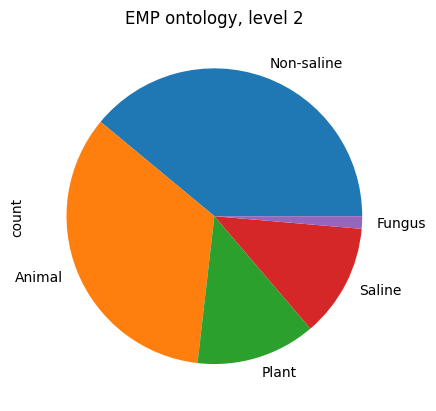

In [ ]:
empo_2_freqs.plot.pie(title='EMP ontology, level 2');

We finalice this section by pointing that a samplemetadata object can also be converted into a pandas dataframe with:

In [ ]:
df_metadata= meta.to_dataframe()
df_metadata.head(5)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.angenent.65.s001,Angenent65.misc.104,bioreactor sludge,08/09/2011 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s002,Angenent65.misc.519,bioreactor sludge,9/27/12 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.519,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s003,Angenent65.misc.946,bioreactor sludge,11/28/13 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s004,Angenent65.misc.1022,bioreactor sludge,02/12/2014 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.519,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s005,Angenent65.misc.1538,bioreactor sludge,7/13/15 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.1538,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome


## Filtering metadata from **Latino America** (7 min)

### Exercise # 1 Filtering data from latinoamerica (begginners)
Ask the colab IA to filter latinamerica metadata for you.
1. Push the +code (+código) button to generaate a new cell
2. Click on generate (generar) with IA
3. Add the following text to the cell "Please filter from meta object keeping only those samples that were collected in latam_countries"
4. Run the cell (control + enter)


### Answer to exercise
You should get 92 rows, corresponding to Latinamerica samples. After doing th excercise just keep runing the next cells (Just to be sure everybody run the same code)

For this Workshop we will only use  samples from **Latino America**, so we will select the Latino America countries for data filtering. Next we create a list of latinamerican countries

In [ ]:
latam_countries =  [
    'Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua',
    'Costa Rica', 'Panama', 'Colombia', 'Venezuela', 'Ecuador', 'Peru',
    'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay', 'Brazil', 'Cuba',
    'Dominican Republic', 'Puerto Rico', 'Haiti'
]
latam_countries

['Mexico',
 'Guatemala',
 'Honduras',
 'El Salvador',
 'Nicaragua',
 'Costa Rica',
 'Panama',
 'Colombia',
 'Venezuela',
 'Ecuador',
 'Peru',
 'Bolivia',
 'Paraguay',
 'Chile',
 'Argentina',
 'Uruguay',
 'Brazil',
 'Cuba',
 'Dominican Republic',
 'Puerto Rico',
 'Haiti']

In [ ]:
latam_samples = df_metadata[sample_df['country'].isin(latam_countries)]
latam_samples.head()


,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,NaN,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,NaN,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s014,Jensen43.MX12.236,sediment,07/05/2010,Mexico,15,Jensen43.sediment.14,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-236,NaN,18.75917,-87.34052,Jensen sediments from global ocean,marine sediment metagenome
13114.pinto.62.s001,Pinto62.excavatedsoil.1,soil,5/21/16 0:00,Costa Rica,0,Soil excavated by the ants,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,excavated soil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome
13114.pinto.62.s002,Pinto62.undisturbedsoil.1,soil,5/21/16 0:00,Costa Rica,0,Soil not associated with the ant nest,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,undisturbedsoil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome


In [ ]:
# Create a SampleMetadata object from the pandas DataFrame
latam_meta = SampleMetadata(latam_samples, default_missing_scheme='INSDC:missing')
latam_meta

SampleMetadata
--------------
92 IDs x 33 columns
sample_name_original:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
sample_type:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
collection_timestamp:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
country:                       ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
depth_sample:                  ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
description:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
elevation:                     ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_principal_investigator: ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_study_id:               ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_pi_study_id:            ColumnProperties(type='

In [ ]:
country_latam = latam_meta.get_column('country')
country_latam

<CategoricalMetadataColumn name='country' id_count=92>

In [ ]:
country_latam_series = country_latam.to_series()
country_latam_series

,country
sample_name,
13114.jensen.43.s012,Mexico
13114.jensen.43.s013,Mexico
13114.jensen.43.s014,Mexico
13114.pinto.62.s001,Costa Rica
13114.pinto.62.s002,Costa Rica
...,...
13114.zaneveld.9.s006,Panama
13114.zaneveld.9.s010,Panama
13114.zaneveld.9.s011,Panama


In [ ]:
country_latam_freqs = country_latam_series.value_counts()
country_latam_freqs

,count
country,
Costa Rica,52
Mexico,14
Peru,12
Guatemala,7
Panama,7


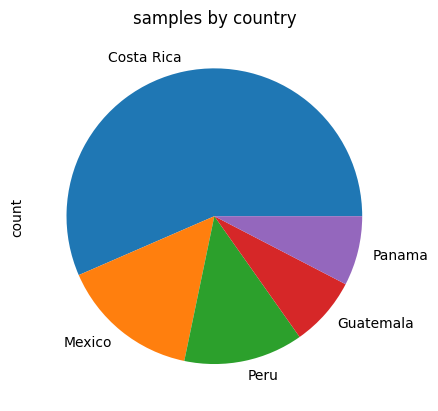

In [ ]:
country_latam_freqs.plot.pie(title='samples by country');

## Shotgun metagenomics ( 7 min)

[**Shotgun sequencing**](https://en.wikipedia.org/wiki/Shotgun_sequencing) randomly sequences all DNA fragments in a biological sample, rather than targeting a specific DNA region as amplicon sequencing does. [Shotgun metagenomics](https://en.wikipedia.org/wiki/Shotgun_sequencing#Metagenomic_shotgun_sequencing), or whole-metagenomic shotgun (WMS) sequencing, or simply "[metagenomics](https://en.wikipedia.org/wiki/Metagenomics)", is the application of shotgun sequencing to recover DNA sequences from all microorganisms in a habitat.

Compared with 16S rRNA sequencing, shotgun metagenomics delivers higher resolution (usually down to species- or even strain-level), informs function in addition to composition, and includes all domains of life (including viruses and eukaryotes) rather than just prokaryotes, despite being more expensive, and more challenging in bioinformatic analysis.

There are two strategies to analyze shotgun metagenomic data:

1) **Read-based**, which usually involves mapping sequencing reads against a reference database to inform the composition of a metagenome.
2) **Assembly-based**, which performs assembly of sequencing reads to recover the original microbial genomes in a (usually) reference-free way.

The shotgun metagenomic data processed using the read-based method is provided within the `shotgun` directory.

The basic data table is `ogu.biom`. This table was generated by aligning sequencing reads against the Web of Life 2 (**WoL2**) reference genome database ([Zhu et al., 2019](https://www.nature.com/articles/s41467-019-13443-4)), and quantifying the number of reads mapped to each reference genome. The database files are available at:

- https://ftp.microbio.me/pub/wol2/

In [ ]:
from skbio import Table

In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
latamogu_path = github_data_path + "shotgun/latam_ogu.biom"
latam_ogu = Table.read(latamogu_path)
latam_ogu

14933 x 68 <class 'biom.table.Table'> with 90562 nonzero entries (8% dense)

In [ ]:
latam_df = latam_ogu.to_dataframe()
# show dataframe DataFrame
latam_df.head()  # It shows the first rows

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
G000005825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G000006175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G000006605,0,0,0,0,0,0,0,0,0,0,...,0,0,6.0,0,0,0,0,0,0,0
G000006725,0,1.0,0,0,0,0,0,0,70.0,0,...,0,0,0,0,0,0,0,0,0,0
G000006745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


Each feature represents a reference genome. They are referred to as the operational genomic units (OGUs) [Zhu et al., 2022](journals.asm.org/doi/full/10.1128/msystems.00167-22), a term indicating that they are not the exact genomes that are present in the sample, but are reference genomes to which sequencing data can be mapped to. The true members of the microbial community may be closely related to those reference strains.


In [ ]:
latam_ogu.get_table_density()

0.0891846325351275

In the next section you will notice a difference in get_table_density() between 16S rRNA (0,2 %) and shotgun metagenomics (8,9 %) about sparece.  This is expected and reflects the nature of each sequencing method. 16S rRNA sequencing targets only a specific region of the bacterial genome, producing sparse data with fewer shared features across samples. In contrast, shotgun sequencing captures all genomic content, including bacteria, archaea, viruses, and functional genes. This broader coverage results in richer datasets, with more features consistently detected across samples, leading to a significantly higher table density. Therefore, shotgun data tends to be more comprehensive and less sparse than 16S-based datasets.

### Taxonomy

The taxonomic assignments of the OGUs are provided in ogu.tax.

OGUs IDs from filtered BIOM

In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
latamtax_path = github_data_path + "shotgun/latam_ogu.tax"

In [ ]:
# Read the TSV file directly from the URL into a pandas DataFrame
tax_df = pd.read_csv(latamtax_path, sep='\t', low_memory=False, header=None,index_col=0)

In [ ]:
# Print the head of the pandas DataFrame to verify
tax_df.iloc[:,:6].head()

,1
0,
G000005825,d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
G000006175,d__Archaea; p__Methanobacteriota_A; c__Methano...
G000006605,d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000006725,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000006745,d__Bacteria; p__Proteobacteria; c__Gammaproteo...


In [ ]:
# === 3. Extract phylum from taxonomy ===
tax_df['Phylum'] = tax_df.iloc[:, 0].str.extract(r'p__([^;]+)')
tax_df

,1,Phylum
0,,
G000005825,d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...,Firmicutes
G000006175,d__Archaea; p__Methanobacteriota_A; c__Methano...,Methanobacteriota_A
G000006605,d__Bacteria; p__Actinobacteriota; c__Actinomyc...,Actinobacteriota
G000006725,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,Proteobacteria
G000006745,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,Proteobacteria
...,...,...
G902826025,d__Bacteria; p__Actinobacteriota; c__Acidimicr...,Actinobacteriota
G902826465,d__Bacteria; p__Acidobacteriota; c__Vicinamiba...,Acidobacteriota
G902826605,d__Bacteria; p__Acidobacteriota; c__Acidobacte...,Acidobacteriota


In [ ]:
# 4. Merge counts with phylum assignments
latam_df['Phylum'] = tax_df['Phylum']
latam_df['Phylum']

,Phylum
G000005825,Firmicutes
G000006175,Methanobacteriota_A
G000006605,Actinobacteriota
G000006725,Proteobacteria
G000006745,Proteobacteria
...,...
G902826025,Actinobacteriota
G902826465,Acidobacteriota
G902826605,Acidobacteriota
G902827015,Proteobacteria


In [ ]:
# 5. Group by phylum and sum abundances
df_phylum = latam_df.groupby('Phylum').sum()
df_phylum

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
Phylum,,,,,,,,,,,,,,,,,,,,,
AABM5-125-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acidobacteriota,94.0,58.0,26.0,64.0,268.0,276.0,358.0,631.0,718.0,190.0,...,270.0,9.0,4523.0,54.0,83.0,55.0,11.0,2.0,34.0,2.0
Actinobacteriota,717.0,265.0,139.0,760.0,414.0,1897.0,3216.0,3585.0,2697.0,2945.0,...,16804.0,152630.0,153761.0,896.0,1366.0,984.0,100.0,52.0,276.0,154681.0
Aerophobota,0,0,0,0,0,0,0,0,0,0,...,0,0,11.0,0,0,0,0,0,0,0
Altiarchaeota,0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBA9089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UBP14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Verrucomicrobiota,86.0,32.0,41.0,4.0,26.0,1.0,13.0,3.0,43.0,13.0,...,1524.0,6095.0,9667.0,29.0,49.0,26.0,1.0,0,4.0,69604.0


In [ ]:
# 2. Add information from empo_2 to each sample
# Create a mapping DataFrame: sample -> empo_2
sample_to_empo = latam_samples['empo_2']
sample_to_empo

,empo_2
sample_name,
13114.jensen.43.s012,Saline
13114.jensen.43.s013,Saline
13114.jensen.43.s014,Saline
13114.pinto.62.s001,Non-saline
13114.pinto.62.s002,Non-saline
...,...
13114.zaneveld.9.s006,Animal
13114.zaneveld.9.s010,Animal
13114.zaneveld.9.s011,Animal


In [ ]:
# 3. Transpose df_phylum to have samples as rows (to group by empo_2)
df_phylum_T = df_phylum.T
df_phylum_T

Phylum,AABM5-125-24,Acidobacteriota,Actinobacteriota,Aerophobota,Altiarchaeota,Aquificota,Armatimonadota,Asgardarchaeota,Atribacterota,Aureabacteria,...,Thermotogota,UBA10199,UBA6262,UBA8248,UBA8481,UBA9089,UBP14,Verrucomicrobiota,WOR-3,Zixibacteria
13114.jensen.43.s012,0,94.0,717.0,0,0,0,0,0,0,0,...,0,2.0,0,1.0,0,0,0,86.0,0,0
13114.jensen.43.s013,0,58.0,265.0,0,2.0,0,0,13.0,0,0,...,0,0,0,0,0,0,0,32.0,0,2.0
13114.jensen.43.s014,0,26.0,139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41.0,0,0
13114.pinto.63.s001,0,64.0,760.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,0,0
13114.pinto.63.s002,0,268.0,414.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,55.0,984.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.0,0,0
13114.zaneveld.9.s010,0,11.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
13114.zaneveld.9.s011,0,2.0,52.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s012,0,34.0,276.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,0,0


In [ ]:
# 4. Add the empo_2 column to that DataFrame
df_phylum_T['empo_2'] = sample_to_empo
df_phylum_T

Phylum,AABM5-125-24,Acidobacteriota,Actinobacteriota,Aerophobota,Altiarchaeota,Aquificota,Armatimonadota,Asgardarchaeota,Atribacterota,Aureabacteria,...,UBA10199,UBA6262,UBA8248,UBA8481,UBA9089,UBP14,Verrucomicrobiota,WOR-3,Zixibacteria,empo_2
13114.jensen.43.s012,0,94.0,717.0,0,0,0,0,0,0,0,...,2.0,0,1.0,0,0,0,86.0,0,0,Saline
13114.jensen.43.s013,0,58.0,265.0,0,2.0,0,0,13.0,0,0,...,0,0,0,0,0,0,32.0,0,2.0,Saline
13114.jensen.43.s014,0,26.0,139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41.0,0,0,Saline
13114.pinto.63.s001,0,64.0,760.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,0,0,Plant
13114.pinto.63.s002,0,268.0,414.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26.0,0,0,Plant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,55.0,984.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26.0,0,0,Animal
13114.zaneveld.9.s010,0,11.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,0,Animal
13114.zaneveld.9.s011,0,2.0,52.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Animal
13114.zaneveld.9.s012,0,34.0,276.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,0,0,Animal


In [ ]:
#  5. Group by empo_2 and sum
df_grouped = df_phylum_T.groupby('empo_2').sum().T  # Return to phylum as rows
df_grouped

empo_2,Animal,Non-saline,Plant,Saline
Phylum,,,,
AABM5-125-24,0,1.0,0,1.0
Acidobacteriota,239.0,8942.0,5748.0,25232.0
Actinobacteriota,3674.0,147840.0,1156436.0,1234768.0
Aerophobota,0,0,0,98.0
Altiarchaeota,0,1.0,0,2.0
...,...,...,...,...
UBA9089,0,0,0,0
UBP14,0,0,0,0
Verrucomicrobiota,109.0,3540.0,936.0,125818.0


In [ ]:
# 6. Select the 10 most abundant phyla in total
top10_phyla = df_grouped.sum(axis=1).nlargest(10).index
df_top10 = df_grouped.loc[top10_phyla]
df_top10

empo_2,Animal,Non-saline,Plant,Saline
Phylum,,,,
Proteobacteria,19720.0,160531.0,3995378.0,5944467.0
SAR324,10.0,0,290.0,4118309.0
Actinobacteriota,3674.0,147840.0,1156436.0,1234768.0
Thermoproteota,24.0,2191.0,443.0,1383277.0
Bacteroidota,46321.0,17536.0,491310.0,527655.0
Thermoplasmatota,1.0,2.0,22.0,1059048.0
Marinisomatota,0,0,54.0,1018655.0
Cyanobacteria,785.0,109873.0,9045.0,757795.0
Firmicutes,4660.0,1682.0,303859.0,117871.0


In [ ]:
# 7. Convert to relative abundance by empo_2 group
df_rel = df_top10.div(df_top10.sum(axis=0), axis=1)
df_rel

empo_2,Animal,Non-saline,Plant,Saline
Phylum,,,,
Proteobacteria,0.261681,0.363153,0.669873,0.361378
SAR324,0.000133,0.0,0.000049,0.250361
Actinobacteriota,0.048753,0.334443,0.19389,0.075064
Thermoproteota,0.000318,0.004956,0.000074,0.084093
Bacteroidota,0.614671,0.03967,0.082374,0.032077
Thermoplasmatota,0.000013,0.000005,0.000004,0.064382
Marinisomatota,0.0,0.0,0.000009,0.061926
Cyanobacteria,0.010417,0.248554,0.001517,0.046068
Firmicutes,0.061837,0.003805,0.050946,0.007166


In [ ]:
import matplotlib.pyplot as plt

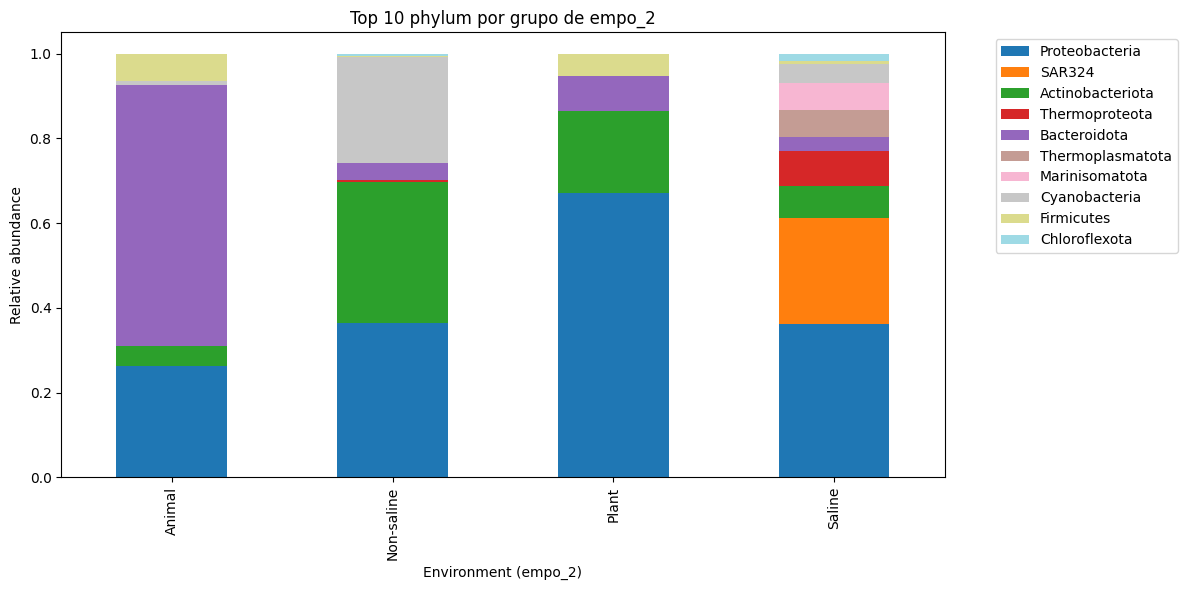

In [ ]:
# 8. Plot
df_rel.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel("Relative abundance")
plt.xlabel("Environment (empo_2)")
plt.title("Top 10 phylum por grupo de empo_2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We can see in the saline samples the group SAR324 which is the name of a bacterial phylum, specifically a candidate phylum, which means it hasn't yet been fully isolated or characterized in the lab, but is known from environmental sequencing data.

The name "SAR" comes from a broader supergroup including Stramenopiles, Alveolates, and Rhizaria. The number 324 refers to the specific group detected in environmental samples—especially from ocean water—during early sequencing studies. SAR324 is part of the "microbial dark matter," which includes microbes that we know exist based on genetic data, but haven't yet been cultivated.

Where is SAR324 found?
In deep ocean waters, In oxygen minimum zones (OMZs), Sometimes in marine sediments

Why is it important?
Genomic evidence suggests that SAR324 may play key roles in global biogeochemical cycles, particularly in the carbon and sulfur cycles, based on the presence of genes related to these metabolic pathways in its genomes. [Delta-proteobacterial SAR324 group in hydrothermal plumes on the South Mid-Atlantic Ridge](https://https://doi.org/10.1038/srep22842)


### Phylogeny

As a classification method, taxonomy is descriptive, operational but coarse. The 7-8 standard taxonomic ranks may fall short in resolving the ever increasing number of discovered organisms (there are now more than 2 million microbial genomes in NCBI). To capture the relationships among microbes with finer resolution, one may resort to phylogeny instead.

A [**phylogenetic tree**](https://en.wikipedia.org/wiki/Phylogenetic_tree) is a graph that describes the evolutionary relationships among organisms. All (cellular) organisms descend from a common ancestor. Therefore a tree structure from a root to many tips can unite them all. The phylogenetic tree not only contains the branching pattern (**topology**) indicating the order of speciation, but also provides **branch lengths** indicating the amount of evolution accumulated within each lineage. Therefore, phylogeny is suitable for modeling microbial feature relations in a quantitative manner.

The WoL2 reference phylogeny is provided by `ogu.nwk`. It is a [Newick](https://en.wikipedia.org/wiki/Newick_format)-formatted file. One can read it using scikit-bio's [`TreeNode`](https://scikit.bio/docs/latest/generated/skbio.tree.TreeNode.html) class.

In [ ]:
from skbio import TreeNode

Get the OGU IDs (index of the DataFrame) to match tree tips
latam_tips = set(latam_ogu_df.index)

Filter (shear) the tree to include only those tips
latam_tree = tree.shear(latam_tips)

Save the pruned tree
latam_tree.write(f'{HOME}/shotgun/latam_ogu.nwk')

In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
latamtree_path = github_data_path + "shotgun/latam_ogu.nwk"

# Read the TSV file directly from the URL into a pandas DataFrame
#tax_df = pd.read_csv(latamtax_path, sep='\t', low_memory=False, header=None,index_col=0)

# Print the head of the pandas DataFrame to verify
#tax_df.iloc[:,:6].head()

In [ ]:
tree_latam = TreeNode.read(latamtree_path)
tree_latam

<TreeNode, name: N1, internal node count: 14326, tips count: 14933>

Because the tree is large, we cannot display the entirety of it. But let's locate an arbitrary tip (the first OGU in the list, `G000005825`), trace up to its grandparent, and display a very small clade descending from it.

In [ ]:
print(tree_latam.find('G000005825').parent.parent.ascii_art())

                    /-G000005825
          /N8376---|
         |         |          /-G000513115
         |          \N8873---|
         |                   |          /-G000513095
-N7879---|                    \N9376---|
         |                              \-G000513135
         |
         |          /-G001310555
          \N8377---|
                   |          /-G001590785
                    \N8874---|
                             |          /-G000292245
                              \N9377---|
                                        \-G001038565


This structure enables a series of analyses, which will be discussed in later sections.

Note: The 16S rRNA data also comes with a reference phylogeny: `16s.nwk` under the `amplicon` directory. We skipped it because it will be discussed in a later section.

As you can see, the tree is quite large. Now that we have generated and filtered the BIOM files, we have also obtained two essential files: latam_samples.tsv (metadata) and latam_ogu.nwk (phylogenetic tree), which can be used in [microreact](https://microreact.org/). [microreact](https://microreact.org/) is a free, interactive platform that allows you to explore phylogenetic trees alongside sample metadata. By uploading the .tsv and .nwk files, you can dynamically investigate relationships, clusters, and patterns across the Latin American samples. This is especially helpful for large datasets, as it enhances data interpretation, interactivity, and communication of results.

Folowing the link you can see the tree in microreact https://microreact.org/project/bXyNWcLQZsAVsVFvuDVYr8-emp500-latino-america

## Mount whole Data in your drive

To use Google Colab and directly mount the shared Google Drive folder containing data files, please execute the following code.

In [ ]:
!head $HOME/README.md

### Upload the data to your drive
While cell [2] runs, please download to your local computer the compressed file https://drive.google.com/file/d/1u5XywaZGfHq0rvyA6NzDqBxev7OtwdNR/view?usp=drive_link and upload it as file to your Google Drive in the root directory. Then you will need to decompress the directory.

Using Zip Extractor (in Google Drive)
1. Open Google Drive and navigate to the zipped file.  
2. Right-click the file and select "Open with".  
3. Choose Zip Extractor.  
4. If prompted, authorize Zip Extractor to access your Drive files.  
5. Select the destination folder where you want to extract the files.  
Click "Extract Now".   



Verify that skbio has been installed by printing the version

In [ ]:
import skbio
skbio.__version__

'0.6.3'

Import common libraries. numpy for arrays and matrices, logical operations and filtering. pandas for data manipulations and structure, make a data frames , read .csv ortsv, files. matplitlib for ploting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Specify your remote directory
HOME = '/content/drive/MyDrive/emp500' # Jeanett
#HOME = '/content/drive/MyDrive/sci-kit-bio_local/emp500/Data' #Nelly

Check if the directory exists by listing its content. you can use the Home directory

In [ ]:
!ls $HOME

amplicon  latam_samples.tsv		   masspec    sample.tsv
assembly  latam_samples_with_tree_ids.tsv  README.md  shotgun


Also you can use the path of your directory to check the content  